In [2]:
import os, sys
import xarray as xr
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
import numpy as np
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import matplotlib.colors as mcolors

sys.path.append('../modules')
from plotter import draw_basemap, plot_terrain



In [3]:
path_to_data = '/data/projects/Comet/cwp140/'
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [4]:
fname = path_to_data + 'preprocessed/ERA5_IVT_clim_intwest.nc'
ds = xr.open_dataset(fname)
ds

/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
Struct() takes at most 1 argument (3 given)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:   (location: 71)
Coordinates:
    lat       (location) float64 ...
    lon       (location) float64 ...
  * location  (location) int64 0 1 2 3 4 5 6 7 8 ... 62 63 64 65 66 67 68 69 70
Data variables:
    maxIVT    (location) float64 ...
    meanIVT   (location) float64 ...

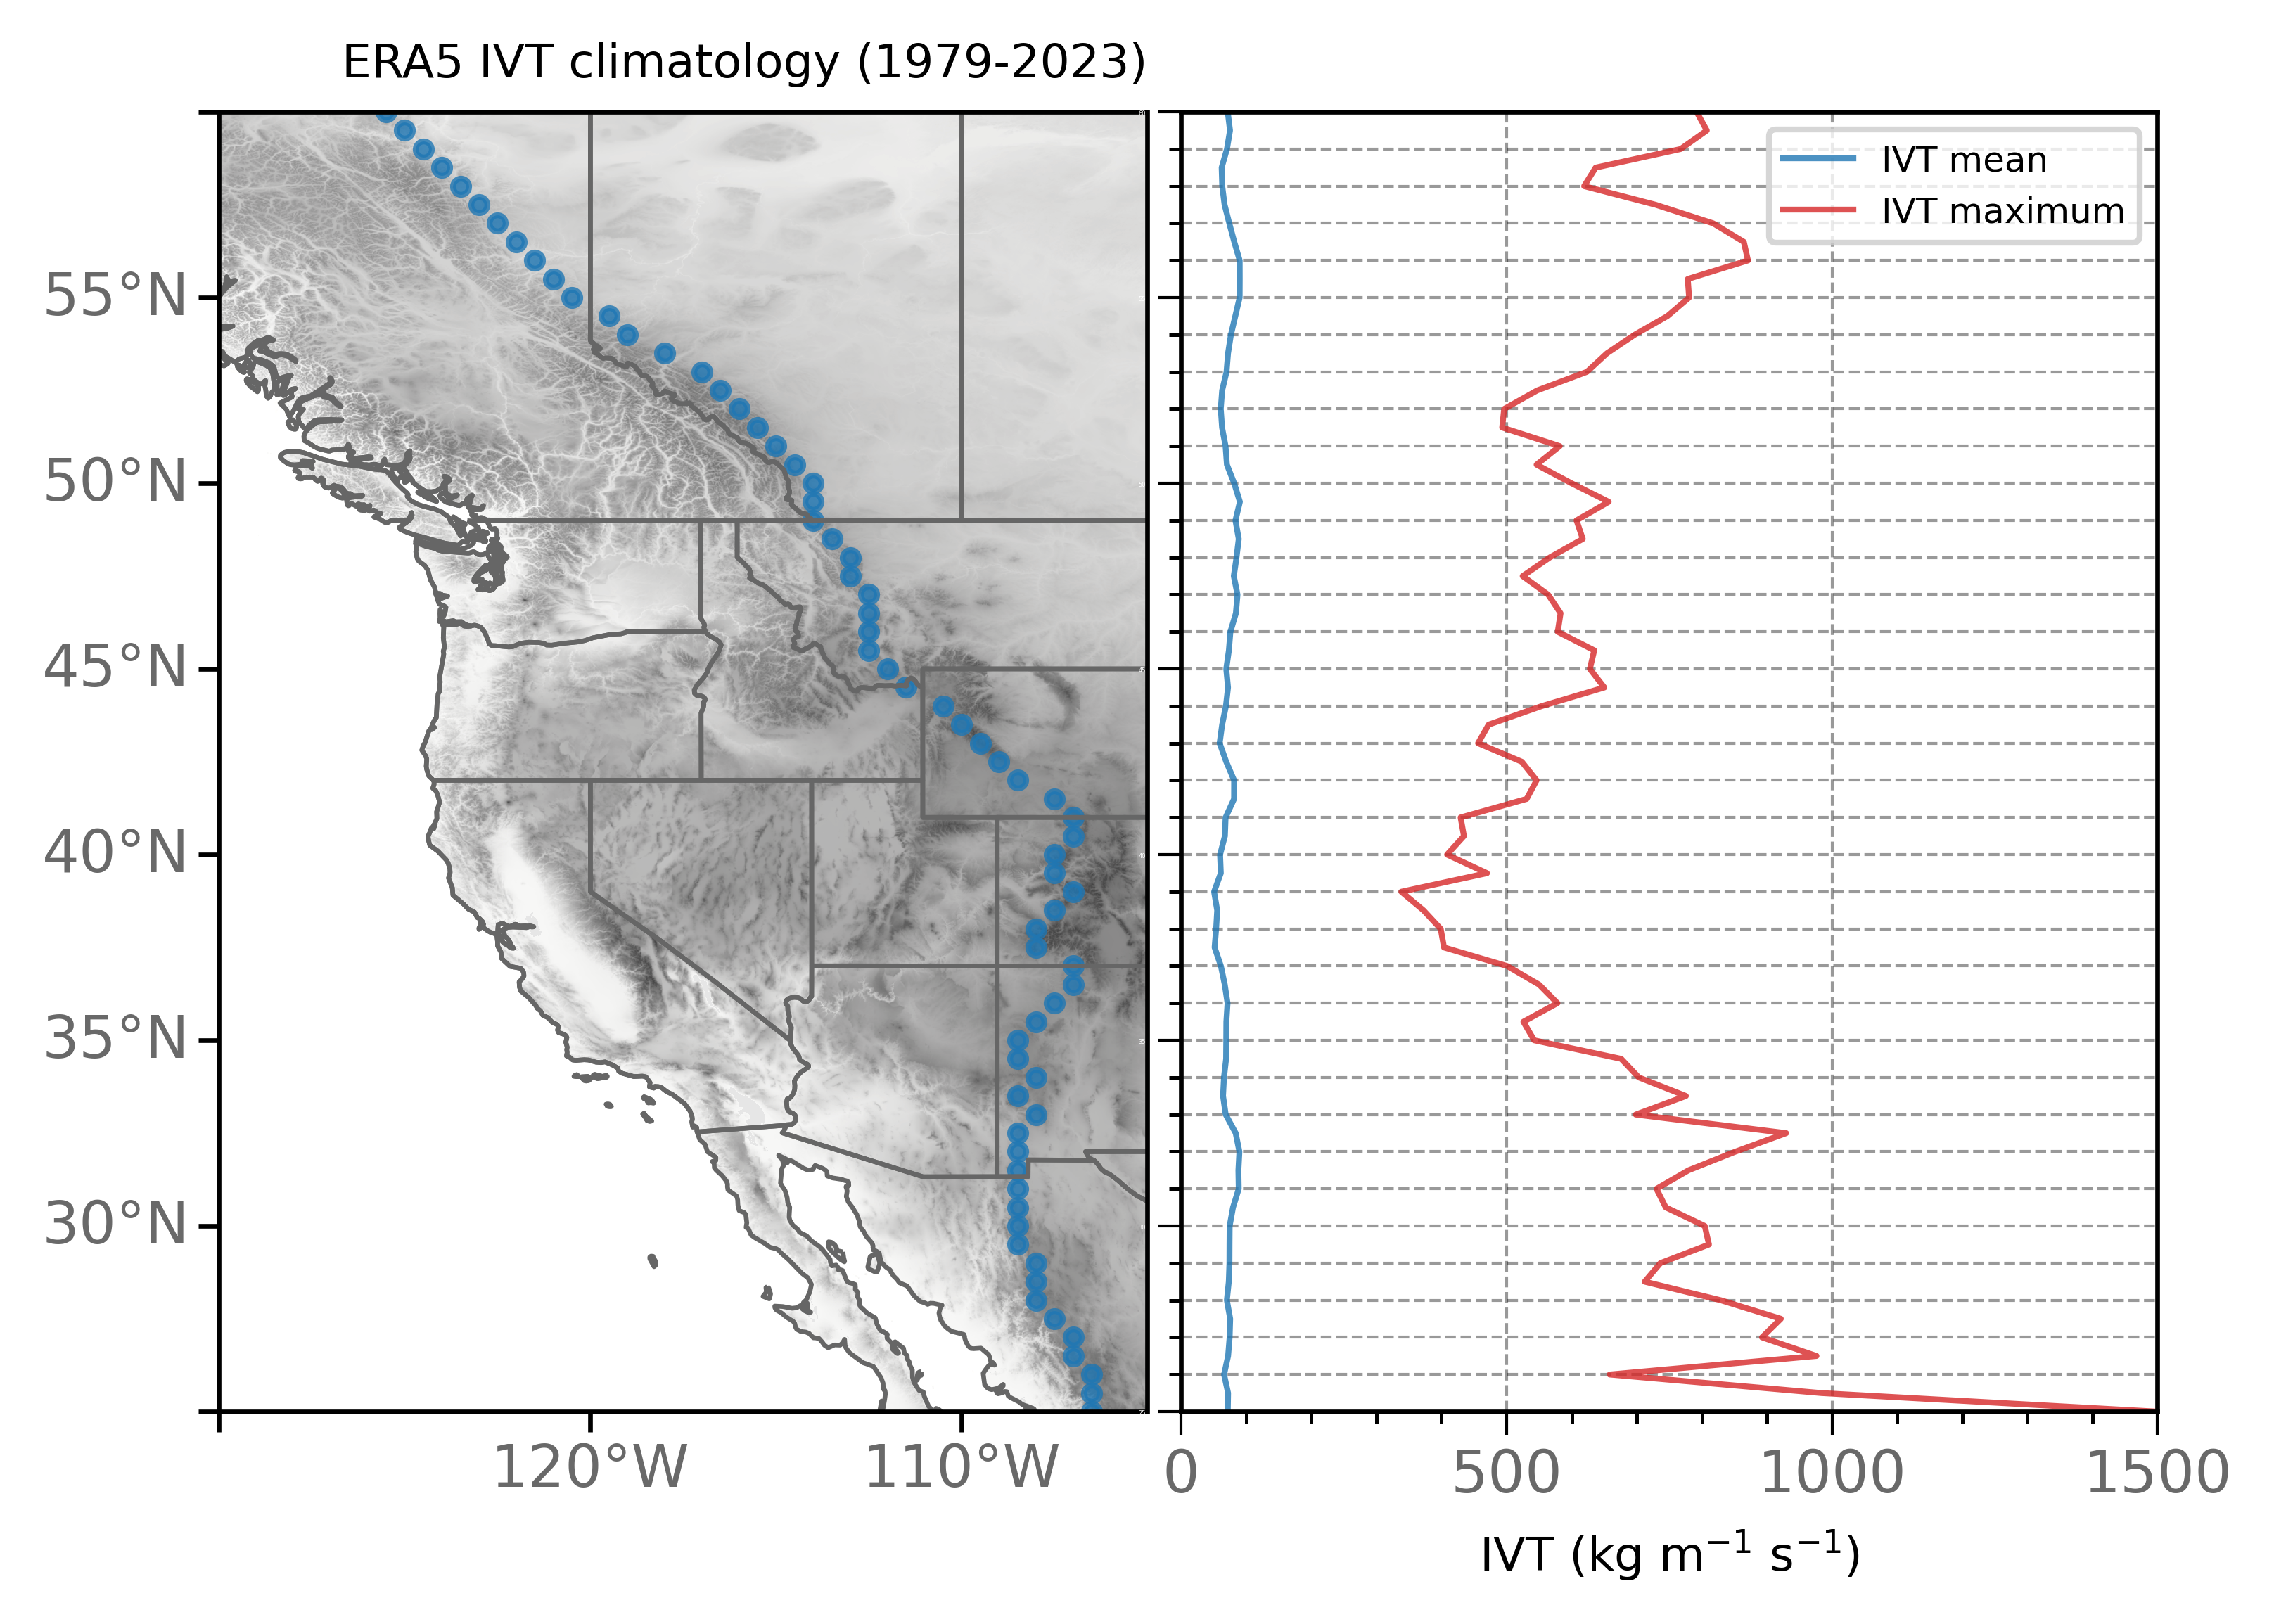

In [11]:
kw_ticklabels = {'size': 10, 'color': 'dimgray', 'weight': 'light'}
kw_grid = {'linewidth': .5, 'color': 'k', 'linestyle': '--', 'alpha': 0.4}
kw_ticks = {'length': 4, 'width': 0.5, 'pad': 2, 'color': 'black',
                 'labelsize': 10, 'labelcolor': 'dimgray'}

nrows = 1
ncols = 2

## Use gridspec to set up a plot with a series of subplots that is
## n-rows by n-columns
gs = GridSpec(nrows, ncols, height_ratios=[1], width_ratios = [1, 1], wspace=0.01, hspace=0.1)
## use gs[rows index, columns index] to access grids

fig = plt.figure(figsize=(6.0, 4.0))
fig.dpi = 600
fname = path_to_figs + 'intwest_IVT_climatology'
fmt = 'png'

datacrs = ccrs.PlateCarree()  ## the projection the data is in
mapcrs = ccrs.PlateCarree() ## the projection you want your map displayed in
ext = [-130., -105., 25., 60]
# Set tick/grid locations
tx = 10
ty = 5
dx = np.arange(ext[0],ext[1]+tx,tx)
dy = np.arange(ext[2],ext[3]+ty,ty)

ax = fig.add_subplot(gs[0, 0], projection=mapcrs)
ax = draw_basemap(ax, extent=ext, xticks=dx, yticks=dy, left_lats=True, right_lats=False)
ax.set_extent(ext, datacrs)
## topo with gray shading
cs = plot_terrain(ax, ext)
ax.add_feature(cfeature.STATES, edgecolor='0.4', linewidth=0.8)
ax.set_title('ERA5 IVT climatology (1979-2023)', loc='right', fontsize=8)

## Add different points
y_lst = ds.lat.values
x_lst = ds.lon.values
cf = ax.scatter(x_lst, y_lst, marker='.', transform=datacrs, alpha=0.8, s=30)

### Line plots with IVT climatology
ax2 = fig.add_subplot(gs[0, 1])
y = ds.lat.values
x1 = ds.meanIVT.values
x2 = ds.maxIVT.values

ax2.plot(x1, y, color='tab:blue', linewidth=1., alpha=0.8, label='IVT mean')
ax2.plot(x2, y, color='tab:red', linewidth=1., alpha=0.8, label='IVT maximum')
ax2.set_xlim(0, 1500)
ax2.set_ylim(min(y), max(y))

# apply gridlines and minor ticks
ax2.minorticks_on()
ax2.grid(visible=None, which='both', axis='y', **kw_grid)
ax2.grid(visible=None, which='major', axis='x', **kw_grid)
ax2.tick_params(axis='x', which='minor', bottom=True)
ax2.tick_params(axis='x', which='major', **kw_ticks)
ax2.tick_params(axis='y', which='major', direction='out', **kw_ticks)
plt.yticks(color='w', size=1)

ax2.set_xlabel('IVT (kg m$^{-1}$ s$^{-1}$)', fontsize=8)
ax2.legend(loc=1, fontsize=6)


fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi, transparent=True)
plt.show()
fig.clf()